# 문제: 서울시 공원 정보 시각화 프로젝트

서울시의 공원 데이터를 담고 있는 seoul_parks.csv 파일의 일부 활용 예시입니다:

다음의 조건을 만족하는 프로그램을 작성하세요.

📌 1단계: Pandas로 데이터 불러오기
seoul_parks.csv 파일을 Pandas를 사용하여 불러오세요.

📌 2단계: matplotlib 시각화
matplotlib을 사용하여 구별 공원 수를 바 차트로 시각화하세요.

📌 3단계: seaborn 시각화
seaborn의 boxplot을 이용하여 구별 공원 면적의 분포를 시각화하세요.

📌 4단계: plotly 시각화
plotly로 공원 면적에 따른 인터랙티브한 산점도를 그리세요. (x축: 면적, y축: 구, 마커: 공원이름)

📌 5단계: folium 지도 시각화
folium을 사용하여 모든 공원의 위치를 마커로 지도에 표시하세요.

마커를 클릭하면 공원이름과 면적이 팝업으로 보이게 하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 시스템에 설치된 한글 폰트 설정 (Windows 기준)
plt.rc('font', family='Malgun Gothic')  # '맑은 고딕' 폰트 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

data = pd.read_csv('seoul_parks.csv')
data

,이름,위도,경도,면적,구
0,보라매공원,37.4991,126.9208,425992,동작구
1,서울숲,37.5446,127.0371,1165700,성동구
2,남산공원,37.5509,126.9905,1191416,중구
3,월드컵공원,37.5683,126.8986,2690000,마포구
4,어린이대공원,37.5485,127.0746,530000,광진구
5,용산가족공원,37.5233,126.9802,75000,용산구
6,응봉산근린공원,37.5584,127.0343,200000,성동구
7,우장산근린공원,37.5410,126.8365,300000,강서구


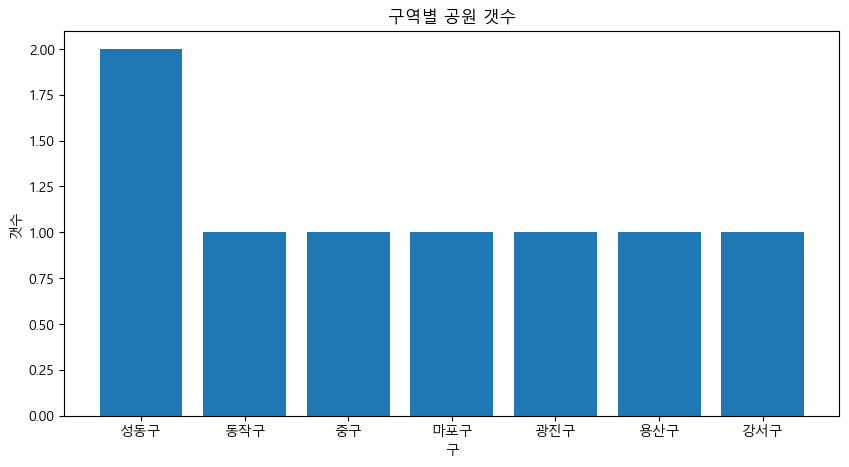

In [2]:
# matplotlib 시각화
plt.figure(figsize=(10, 5))
x = data['구'].value_counts()
plt.bar(x.index, x)

plt.xlabel('구')
plt.ylabel('갯수')
plt.title('구역별 공원 갯수')
plt.show()

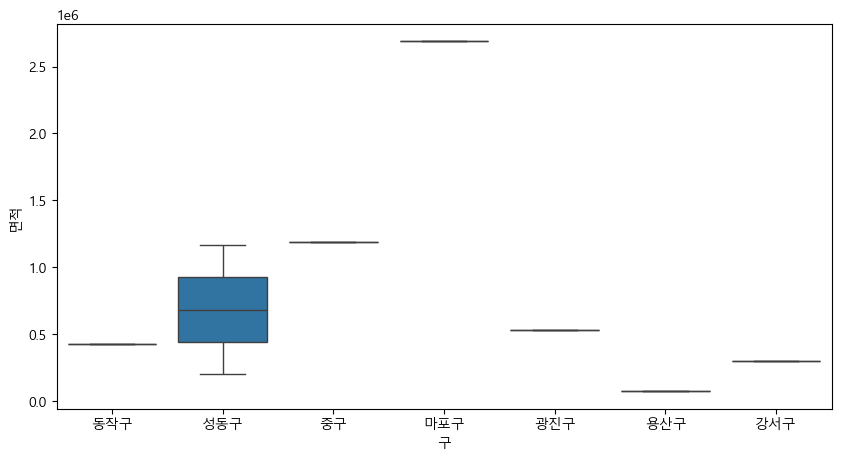

In [3]:
# seaborn 공원면적 시각화 box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='구', y='면적', data=data)

plt.show()



In [4]:
#📌 4단계: plotly 시각화
# plotly로 공원 면적에 따른 인터랙티브한 산점도를 그리세요. 
# (x축: 면적, y축: 구, 마커: 공원이름)
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=data['면적'], y=data['구'], mode='markers', text=data['이름']))
fig.show()

In [33]:
'''
📌 5단계: folium 지도 시각화
folium을 사용하여 모든 공원의 위치를 마커로 지도에 표시하세요.
'''

import folium

map_osm = folium.Map(location=[37.566345, 126.977893], zoom_start=11)
for i in range(len(data)):
    content = data['이름'][i] + '<br>' + '면적 : ' + str(data['면적'][i])
    folium.Marker(
        [data['위도'][i], data['경도'][i]], 
        popup=folium.Popup(content, max_width=200)
    ).add_to(map_osm)

map_osm